In [ ]:
!pip install pytorch-lightning ray optuna torch transformers scikit-learn tqdm gpyopt seaborn matplotlib pandas torchmetrics torch-ema pyyaml ray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.7 MB/s eta 0:00:00

In [ ]:
!python sampling.py

Original size: 60875
Sampled size: 15215

Rating distribution in sampled dataset:
rating
1    3043
2    3043
3    3043
4    3043
5    3043
Name: count, dtype: int64


In [ ]:
folder_name = "results"

# Delete the folder and its contents
!rm -rf {folder_name}

print(f"Folder '{folder_name}' deleted.")

Folder 'results' deleted.


In [ ]:
!python training_script.py

Initializing ray_trainer.py
ray_trainer.py loaded successfully
INFO:__main__:Starting main function
INFO:utils:Starting load_config from path: config.yaml
INFO:utils:Successfully loaded config from: /content/config.yaml
INFO:utils:Exiting load_config
INFO:__main__:Configuration loaded successfully.
INFO:utils:Starting create_directories
INFO:utils:Directory already exists: results
INFO:utils:Directory already exists: results/cached_models
INFO:utils:Directory already exists: results/trained_models
INFO:utils:Directory already exists: results/processed_data
INFO:utils:Directory already exists: results/plots
INFO:utils:Successfully created/verified directories.
INFO:utils:Exiting create_directories
INFO:__main__:Directories created/verified.
Initializing RayTrainer
Starting Ray...
2025-01-31 22:14:03,174	DEBUG node.py:293 -- Setting node ID to e83b11281218735eaf17428a39d6bed66f907af0794cbfee2861b1e2
2025-01-31 22:14:03,176	DEBUG node.py:1409 -- Process STDOUT and STDERR is being redirect

In [ ]:

from google.colab import files
import os

def download_py_files():
    """Downloads all .py files from the Colab environment to your local machine."""

    py_files = [f for f in os.listdir('.') if f.endswith('.py')]

    if not py_files:
        print("No .py files found in the current directory.")
        return

    for filename in py_files:
        try:
            files.download(filename)
            print(f"Downloaded: {filename}")
        except Exception as e:
            print(f"Error downloading {filename}: {e}")

if __name__ == '__main__':
  # Example usage when run in Colab:
  download_py_files()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: progress_bar.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: data_module.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: training_script.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: dataset.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: simple_model.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: ray_trainer.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: sampling.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: utils.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: embeddings.py


In [ ]:
if __name__ == '__main__':
    # Load your data (replace with your actual loading method)
    import pandas as pd
    from embeddings import TextProcessorConfig, GPUEmbeddingGenerator
    df = pd.read_csv('so_many_rev.csv') # Example path

    # Initialize GPUEmbeddingGenerator
    config_gpu = TextProcessorConfig() # Use default config, you can customize if needed
    gpu_processor = GPUEmbeddingGenerator(config=config_gpu)

    # Generate and save embeddings
    gpu_processor.generate_and_save_embeddings_by_rating(df, text_column='text', rating_column='rating')

    print("\nGPU Embedding Generation Complete. Embeddings saved in:", config_gpu.output_embeddings_dir)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating embeddings for rating 1...
Embeddings for rating 1 saved to: output_embeddings/rating_1_embeddings.npy
Generating embeddings for rating 2...
Embeddings for rating 2 saved to: output_embeddings/rating_2_embeddings.npy
Generating embeddings for rating 3...
Embeddings for rating 3 saved to: output_embeddings/rating_3_embeddings.npy
Generating embeddings for rating 4...
Embeddings for rating 4 saved to: output_embeddings/rating_4_embeddings.npy
Generating embeddings for rating 5...
Embeddings for rating 5 saved to: output_embeddings/rating_5_embeddings.npy

GPU Embedding Generation Complete. Embeddings saved in: output_embeddings


In [ ]:
import shutil

# Replace 'folder_name' with the name of your folder
folder_name = 'output_embeddings'

# Create a zip file of the folder
shutil.make_archive(folder_name, 'zip', folder_name)

'/content/output_embeddings.zip'

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


ABSA Model loaded successfully!
Sample Text: terrible sent gate arm defective fortunately service man able exchange one worked

Keywords: ['terrible', 'sent', 'gate', 'arm', 'defective']

Named Entities: []

Aspect-Based Sentiment Analysis: {'terrible': 'Negative', 'sent': 'Negative', 'gate': 'Negative', 'arm': 'Negative', 'defective': 'Negative'}

Extracting features...
Feature Dimension: 772
Preparing data...
Loading features from cache...
Features loaded from cache.
Epoch 1/40
Train Loss: 1.6764, Acc: 0.2058
Val Loss: 1.6234, Acc: 0.2054
Epoch 2/40
Train Loss: 1.6360, Acc: 0.2348
Val Loss: 1.4677, Acc: 0.3526
Epoch 3/40
Train Loss: 1.3308, Acc: 0.4153
Val Loss: 1.1759, Acc: 0.4935
Epoch 4/40
Train Loss: 1.1168, Acc: 0.5233
Val Loss: 1.0930, Acc: 0.5304
Epoch 5/40
Train Loss: 1.0214, Acc: 0.5708
Val Loss: 1.1000, Acc: 0.5411
Epoch 6/40
Train Loss: 0.9317, Acc: 0.6167
Val Loss: 1.0910, Acc: 0.5463
Epoch 7/40
Train Loss: 0.8532, Acc: 0.6577
Val Loss: 1.1333, Acc: 0.5411
Epoch 8/40
Trai

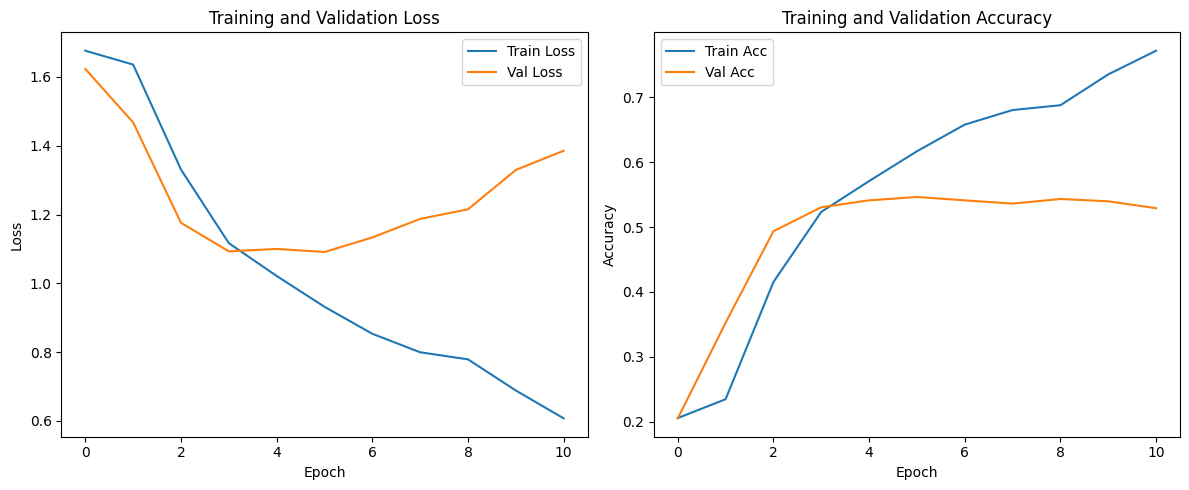

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from transformers import ElectraTokenizer, ElectraModel, AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import spacy
from sentence_transformers import SentenceTransformer
from torch.cuda.amp import autocast, GradScaler
import torch.nn.functional as F
from huggingface_hub import model_info
from huggingface_hub.utils import HfHubHTTPError
import os

# Initialize models
nlp = spacy.load('en_core_web_sm')
st_model = SentenceTransformer('all-mpnet-base-v2') # Updated to all-mpnet-base-v2
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator')

# Define ABSA model name and load using Auto classes
absa_model_name = "yangheng/deberta-v3-base-absa-v1.1"
model_loaded = False

def check_model_name(model_name):
    """
    Checks if a model name is valid and exists on Hugging Face Hub.
    Returns True if the model exists, False otherwise.
    """
    try:
        model_info(model_name)
        return True
    except HfHubHTTPError as e:
        if e.response.status_code == 404:
            print(f"Error: Model '{model_name}' not found on Hugging Face Hub.")
        else:
            print(f"Error checking model '{model_name}': {e}")
        return False
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return False

if check_model_name(absa_model_name):
    try:
        absa_tokenizer = AutoTokenizer.from_pretrained(absa_model_name)
        absa_model = AutoModelForSequenceClassification.from_pretrained(absa_model_name).to('cuda')
        model_loaded = True
        print("ABSA Model loaded successfully!")
    except Exception as e:
        print(f"Error loading ABSA model: {e}")
        print(f"Failed to load ABSA model '{absa_model_name}'.")
else:
    print(f"Model name check failed for '{absa_model_name}'. ABSA functionalities will be skipped.")

class EnhancedElectra(nn.Module):
    def __init__(self, feature_dim, num_classes=5, dropout_rate=0.1):
        super().__init__()
        # ELECTRA output dimension is 768 for base model
        electra_dim = 768 # Changed to 768 for base model

        # Combined input dimension is ELECTRA output + additional features
        combined_dim = electra_dim + feature_dim

        self.layer1 = nn.Linear(combined_dim, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.layer2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.layer3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(256, num_classes)

        # Initialize ELECTRA
        self.electra = ElectraModel.from_pretrained('google/electra-base-discriminator') # Changed to base discriminator

    def forward(self, input_ids, attention_mask, features):
        # Get ELECTRA outputs
        electra_output = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = electra_output.last_hidden_state[:, 0, :]  # Use [CLS] token

        # Combine ELECTRA output with additional features
        combined_features = torch.cat([pooled_output, features], dim=1)

        # Forward through MLP layers
        h1 = F.gelu(self.bn1(self.layer1(combined_features)))
        h1 = self.dropout(h1)

        h2 = F.gelu(self.bn2(self.layer2(h1)))
        h2 = self.dropout(h2)

        h3 = F.gelu(self.bn3(self.layer3(h2)))
        h3 = self.dropout(h3)

        # Final classification
        output = self.classifier(h3)
        return output

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.best_loss = val_loss
            self.counter = 0
        return False

class GPUOptimizedTrainer:
    def __init__(self, texts, labels, hyperparams, val_split=0.2, feature_cache_dir="features_cache"):
        self.device = torch.device('cuda')
        self.hyperparams = hyperparams
        self.batch_size = hyperparams["Batch Size"]
        self.feature_cache_dir = feature_cache_dir
        os.makedirs(self.feature_cache_dir, exist_ok=True)

        torch.backends.cudnn.benchmark = True
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True

        self.feature_dim = self.get_feature_dimension(texts[:1])
        hyperparams["Feature Dimension"] = self.feature_dim
        print(f"Feature Dimension: {hyperparams['Feature Dimension']}")

        self.model = EnhancedElectra(num_classes=5, feature_dim=hyperparams["Feature Dimension"],
                                   dropout_rate=hyperparams["Dropout"]).to(self.device)

        # Updated to use new GradScaler syntax
        self.scaler = torch.amp.GradScaler('cuda')
        self.prepare_data(texts, labels, val_split)
        self.setup_training()

    def get_feature_dimension(self, sample_texts):
        return self.extract_features(sample_texts).shape[1]

    def extract_features(self, texts):
        print("Extracting features...")
        def extract_contextual(texts, batch_size=128):
            features = []
            for i in range(0, len(texts), batch_size):
                batch = texts[i:i + batch_size]
                with torch.no_grad():
                    embeddings = st_model.encode(batch, convert_to_tensor=True)
                    features.extend(embeddings.cpu().numpy())
            return np.array(features)

        def extract_syntactic(texts):
            features = []
            for text in texts:
                doc = nlp(text)
                pos_tags = [token.pos_ for token in doc]
                features.append([len(doc), len(set(pos_tags)) / len(pos_tags),
                               pos_tags.count('NOUN') / len(pos_tags),
                               pos_tags.count('VERB') / len(pos_tags)])
            return np.array(features)

        contextual_features = extract_contextual(texts)
        syntactic_features = extract_syntactic(texts)
        return np.hstack([contextual_features, syntactic_features])

    def prepare_data(self, texts, labels, val_split):
        print("Preparing data...")
        encodings = tokenizer(texts, truncation=True, padding=True, return_tensors='pt')
        input_ids = encodings['input_ids']
        attention_mask = encodings['attention_mask']

        split_idx = int(len(input_ids) * (1 - val_split))
        indices = np.random.permutation(len(input_ids))
        train_idx = indices[:split_idx]
        val_idx = indices[split_idx:]

        self.train_input_ids = input_ids[train_idx]
        self.train_attention_mask = attention_mask[train_idx]
        self.val_input_ids = input_ids[val_idx]
        self.val_attention_mask = attention_mask[val_idx]

        train_feature_path = os.path.join(self.feature_cache_dir, "train_features.pt")
        val_feature_path = os.path.join(self.feature_cache_dir, "val_features.pt")

        if os.path.exists(train_feature_path) and os.path.exists(val_feature_path):
            print("Loading features from cache...")
            # Updated to use weights_only=True for security
            self.train_features = torch.load(train_feature_path, weights_only=True)
            self.val_features = torch.load(val_feature_path, weights_only=True)
            print("Features loaded from cache.")
        else:
            print("Extracting and caching features...")
            features = self.extract_features(texts)
            self.train_features = torch.tensor(features[train_idx], dtype=torch.float32)
            self.val_features = torch.tensor(features[val_idx], dtype=torch.float32)
            torch.save(self.train_features, train_feature_path)
            torch.save(self.val_features, val_feature_path)
            print(f"Features cached to {train_feature_path} and {val_feature_path}")

        self.train_labels = torch.tensor(labels[train_idx], dtype=torch.long)
        self.val_labels = torch.tensor(labels[val_idx], dtype=torch.long)

        scaler = StandardScaler()
        self.train_features = torch.tensor(scaler.fit_transform(self.train_features), dtype=torch.float32)
        self.val_features = torch.tensor(scaler.transform(self.val_features), dtype=torch.float32)

        self.create_dataloaders()

    def create_dataloaders(self):
        train_dataset = TensorDataset(self.train_input_ids, self.train_attention_mask,
                                    self.train_features, self.train_labels)
        val_dataset = TensorDataset(self.val_input_ids, self.val_attention_mask,
                                  self.val_features, self.val_labels)

        self.train_loader = DataLoader(train_dataset, batch_size=self.batch_size,
                                     shuffle=True, pin_memory=True,
                                     num_workers=4, prefetch_factor=3,
                                     persistent_workers=True)
        self.val_loader = DataLoader(val_dataset, batch_size=self.batch_size * 2,
                                   pin_memory=True, num_workers=4)

    def setup_training(self):
        self.optimizer = torch.optim.AdamW(
            self.model.parameters(),
            lr=self.hyperparams["Learning Rate"],
            weight_decay=self.hyperparams["Weight Decay"],
            betas=(0.9, 0.999)
        )

        # Calculate total steps for the scheduler
        num_epochs = self.hyperparams["Epochs"]
        num_training_steps = len(self.train_loader) * num_epochs

        self.scheduler = torch.optim.lr_scheduler.OneCycleLR(
            self.optimizer,
            max_lr=2 * self.hyperparams["Learning Rate"],
            total_steps=num_training_steps,
            epochs=None,
            steps_per_epoch=None,
            pct_start=0.1
        )

        # Initialize early stopping
        self.early_stopping = EarlyStopping(
            patience=self.hyperparams["Early Stopping Patience"],
            min_delta=0
        )

    def train_epoch(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch_idx, (input_ids, attention_mask, features, target) in enumerate(self.train_loader):
            input_ids = input_ids.to(self.device, non_blocking=True)
            attention_mask = attention_mask.to(self.device, non_blocking=True)
            features = features.to(self.device, non_blocking=True)
            target = target.to(self.device, non_blocking=True)

            # Updated to use new autocast syntax
            with torch.amp.autocast('cuda'):
                output = self.model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                loss = F.cross_entropy(output, target)

            self.scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.scaler.step(self.optimizer)
            self.scaler.update()
            self.optimizer.zero_grad(set_to_none=True)
            self.scheduler.step()

            total_loss += loss.item()
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()
            total += target.size(0)

        return {'loss': total_loss / len(self.train_loader), 'acc': correct / total}

    def validate(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for input_ids, attention_mask, features, target in self.val_loader:
                input_ids = input_ids.to(self.device, non_blocking=True)
                attention_mask = attention_mask.to(self.device, non_blocking=True)
                features = features.to(self.device, non_blocking=True)
                target = target.to(self.device, non_blocking=True)

                # Updated to use new autocast syntax
                with torch.amp.autocast('cuda'):
                    output = self.model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                    loss = F.cross_entropy(output, target)

                total_loss += loss.item()
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()
                total += target.size(0)

        return {'loss': total_loss / len(self.val_loader), 'acc': correct / total}

    def train(self, epochs=None):
        if epochs is None:
            epochs = self.hyperparams["Epochs"]

        best_val_loss = float('inf')
        train_losses, val_losses = [], []
        train_accs, val_accs = [], []

        for epoch in range(epochs):
            train_metrics = self.train_epoch()
            val_metrics = self.validate()

            train_losses.append(train_metrics['loss'])
            val_losses.append(val_metrics['loss'])
            train_accs.append(train_metrics['acc'])
            val_accs.append(val_metrics['acc'])

            print(f"Epoch {epoch+1}/{epochs}")
            print(f"Train Loss: {train_metrics['loss']:.4f}, Acc: {train_metrics['acc']:.4f}")
            print(f"Val Loss: {val_metrics['loss']:.4f}, Acc: {val_metrics['acc']:.4f}")

            if val_metrics['loss'] < best_val_loss:
                best_val_loss = val_metrics['loss']
                torch.save(self.model.state_dict(), 'best_model.pt')

            if self.early_stopping(val_metrics['loss']):
                print("Early stopping triggered")
                break

        return {
            'train_loss': train_losses,
            'val_loss': val_losses,
            'train_acc': train_accs,
            'val_acc': val_accs
        }

def extract_keywords(text, nlp_model=nlp, top_n=5):
    doc = nlp_model(text)
    keywords = [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB'] and not token.is_stop]
    return keywords[:top_n]

def extract_ner(text, nlp_model=nlp):
    doc = nlp_model(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

def perform_absa_zero_shot(text, aspects, absa_model=absa_model, absa_tokenizer=absa_tokenizer, device='cuda'):
    if not model_loaded:
        print("ABSA model was not loaded. Skipping ABSA.")
        return {}

    aspect_sentiments = {}
    for aspect in aspects:
        inputs = absa_tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            outputs = absa_model(**inputs)
            probs = torch.softmax(outputs.logits, dim=-1)
            sentiment_id = torch.argmax(probs, dim=-1).item()

        sentiment_label = absa_model.config.id2label[sentiment_id] if hasattr(absa_model.config, 'id2label') else str(sentiment_id)
        aspect_sentiments[aspect] = sentiment_label
    return aspect_sentiments

if __name__ == "__main__":
    data_path = "/content/processed_df.csv"
    df = pd.read_csv(data_path)
    df['text'] = df['modified_text']

    df["label"] = df["rating"] - 1
    texts = df["text"].tolist()
    labels = np.array(df["label"].tolist())

    hyperparams = {
        "Epochs": 40,
        "Batch Size": 32,
        "Learning Rate": 1e-5,
        "Dropout": 0.3,
        "Weight Decay": 0.1,
        "Label Smoothing": 0.1,
        "Early Stopping Patience": 5,
        "Gradient Accumulation Steps": 4,
        "Optimizer": "AdamW",
        "Scheduler": "OneCycleLR",
        "Feature Dimension": 768 + 4, # Updated Feature Dimension calculation - important!
        "Model": "Electra-base" # Updated Model Name in Hyperparams
    }

    sample_text = texts[0]
    print(f"Sample Text: {sample_text}\n")

    keywords = extract_keywords(sample_text)
    print(f"Keywords: {keywords}\n")

    entities = extract_ner(sample_text)
    print(f"Named Entities: {entities}\n")

    aspects_for_absa = keywords
    if model_loaded:
        aspect_sentiments = perform_absa_zero_shot(sample_text, aspects_for_absa)
        print(f"Aspect-Based Sentiment Analysis: {aspect_sentiments}\n")
    else:
        print("Skipping ABSA due to model loading failure.\n")

    trainer = GPUOptimizedTrainer(texts, labels, hyperparams=hyperparams)
    metrics = trainer.train()

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_loss'], label='Train Loss')
    plt.plot(metrics['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(metrics['train_acc'], label='Train Acc')
    plt.plot(metrics['val_acc'], label='Val Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel  # Change to BERT
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import spacy
from sentence_transformers import SentenceTransformer
from torch.cuda.amp import autocast, GradScaler
import torch.nn.functional as F

# Initialize models
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'lemmatizer'])
st_model = SentenceTransformer('all-MiniLM-L6-v2')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Change to BERT tokenizer

class RegularizedBERT(nn.Module):
    def __init__(self, num_labels, feature_dim):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')  # Change to BERT
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Sequential(
            nn.Linear(768 + feature_dim, 384),  # BERT output size is 768
            nn.LayerNorm(384),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(384, num_labels)
        )

    def forward(self, input_ids, attention_mask, features):
        # Get BERT output
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = bert_output.last_hidden_state[:, 0, :]  # Use [CLS] token representation

        # Concatenate with engineered features
        combined_features = torch.cat([pooled_output, features], dim=1)

        # Pass through classifier
        output = self.classifier(combined_features)
        return output

class GPUOptimizedTrainer:
    def __init__(self, texts, labels, batch_size=32, val_split=0.2):
        self.device = torch.device('cuda')
        self.batch_size = batch_size

        torch.backends.cudnn.benchmark = True
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True

        # Extract features to determine feature dimension
        self.feature_dim = self.extract_features(texts[:1]).shape[1]  # Get feature dimension from a single sample

        self.model = RegularizedBERT(num_labels=5, feature_dim=self.feature_dim).to(self.device)

        self.scaler = GradScaler()
        self.prepare_data(texts, labels, val_split)
        self.setup_training()

    def extract_features(self, texts):
        print("Extracting features...")

        def extract_contextual(texts, batch_size=128):
            features = []
            for i in range(0, len(texts), batch_size):
                batch = texts[i:i + batch_size]
                with torch.no_grad():
                    embeddings = st_model.encode(batch, convert_to_tensor=True)
                    features.extend(embeddings.cpu().numpy())
            return np.array(features)

        def extract_syntactic(texts):
            features = []
            for text in texts:
                doc = nlp(text)
                pos_tags = [token.pos_ for token in doc]

                features.append([
                    len(doc),  # document length
                    len(set(pos_tags)) / len(pos_tags),  # POS diversity
                    pos_tags.count('NOUN') / len(pos_tags),  # noun ratio
                    pos_tags.count('VERB') / len(pos_tags),  # verb ratio
                ])
            return np.array(features)

        contextual_features = extract_contextual(texts)
        syntactic_features = extract_syntactic(texts)

        return np.hstack([contextual_features, syntactic_features])

    def prepare_data(self, texts, labels, val_split):
        print("Preparing data...")

        # Tokenize the text data using BERT tokenizer
        encodings = tokenizer(texts, truncation=True, padding=True, return_tensors='pt')
        input_ids = encodings['input_ids']
        attention_mask = encodings['attention_mask']

        # Extract engineered features
        features = self.extract_features(texts)

        # Normalize features
        scaler = StandardScaler()
        features = scaler.fit_transform(features)

        # Split data
        split_idx = int(len(input_ids) * (1 - val_split))
        indices = np.random.permutation(len(input_ids))

        train_idx = indices[:split_idx]
        val_idx = indices[split_idx:]

        self.train_input_ids = input_ids[train_idx]
        self.train_attention_mask = attention_mask[train_idx]
        self.train_features = torch.tensor(features[train_idx], dtype=torch.float32)
        self.train_labels = torch.tensor(labels[train_idx], dtype=torch.long)

        self.val_input_ids = input_ids[val_idx]
        self.val_attention_mask = attention_mask[val_idx]
        self.val_features = torch.tensor(features[val_idx], dtype=torch.float32)
        self.val_labels = torch.tensor(labels[val_idx], dtype=torch.long)

        self.create_dataloaders()

    def create_dataloaders(self):
        train_dataset = TensorDataset(self.train_input_ids, self.train_attention_mask, self.train_features, self.train_labels)
        val_dataset = TensorDataset(self.val_input_ids, self.val_attention_mask, self.val_features, self.val_labels)

        self.train_loader = DataLoader(
            train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            pin_memory=True,
            num_workers=4,
            prefetch_factor=3,
            persistent_workers=True
        )

        self.val_loader = DataLoader(
            val_dataset,
            batch_size=self.batch_size * 2,
            pin_memory=True,
            num_workers=4
        )

    def setup_training(self):
        self.optimizer = torch.optim.AdamW(
            self.model.parameters(),
            lr=1e-5,
            weight_decay=0.1,
            betas=(0.9, 0.999)
        )

        self.scheduler = torch.optim.lr_scheduler.OneCycleLR(
            self.optimizer,
            max_lr=2e-5,
            epochs=50,
            steps_per_epoch=len(self.train_loader),
            pct_start=0.1
        )

        self.early_stopping = EarlyStopping(patience=3)

    def train(self, epochs=15):
        best_val_loss = float('inf')
        train_losses, val_losses = [], []
        train_accs, val_accs = [], []

        for epoch in range(epochs):
            train_metrics = self.train_epoch()
            val_metrics = self.validate()

            train_losses.append(train_metrics['loss'])
            val_losses.append(val_metrics['loss'])
            train_accs.append(train_metrics['acc'])
            val_accs.append(val_metrics['acc'])

            print(f"Epoch {epoch+1}/{epochs}")
            print(f"Train Loss: {train_metrics['loss']:.4f}, Acc: {train_metrics['acc']:.4f}")
            print(f"Val Loss: {val_metrics['loss']:.4f}, Acc: {val_metrics['acc']:.4f}")

            if val_metrics['loss'] < best_val_loss:
                best_val_loss = val_metrics['loss']
                torch.save(self.model.state_dict(), 'best_model.pt')

            if self.early_stopping(val_metrics['loss']):
                print("Early stopping triggered")
                break

            self.scheduler.step()

        return {
            'train_loss': train_losses,
            'val_loss': val_losses,
            'train_acc': train_accs,
            'val_acc': val_accs
        }

    def train_epoch(self):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch_idx, (input_ids, attention_mask, features, target) in enumerate(self.train_loader):
            input_ids = input_ids.to(self.device, non_blocking=True)
            attention_mask = attention_mask.to(self.device, non_blocking=True)
            features = features.to(self.device, non_blocking=True)
            target = target.to(self.device, non_blocking=True)

            with autocast():
                output = self.model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                loss = F.cross_entropy(output, target)

            self.scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.scaler.step(self.optimizer)
            self.scaler.update()
            self.optimizer.zero_grad(set_to_none=True)
            self.scheduler.step()

            total_loss += loss.item()
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()
            total += target.size(0)

        return {'loss': total_loss / len(self.train_loader), 'acc': correct / total}

    def validate(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for input_ids, attention_mask, features, target in self.val_loader:
                input_ids = input_ids.to(self.device, non_blocking=True)
                attention_mask = attention_mask.to(self.device, non_blocking=True)
                features = features.to(self.device, non_blocking=True)
                target = target.to(self.device, non_blocking=True)

                with autocast():
                    output = self.model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                    loss = F.cross_entropy(output, target)

                total_loss += loss.item()
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()
                total += target.size(0)

        return {'loss': total_loss / len(self.val_loader), 'acc': correct / total}

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.best_loss = val_loss
            self.counter = 0
        return False

if __name__ == "__main__":
    data_path = "/content/so_many_rev.csv"
    df = pd.read_csv(data_path)
    #df['text'] = df['modified_text']
    #df.drop(columns=["Unnamed: 0", "modified_text"], inplace=True)
    df["label"] = df["rating"] - 1
    texts = df["text"].tolist()
    labels = np.array(df["label"].tolist())

    trainer = GPUOptimizedTrainer(texts, labels)
    metrics = trainer.train()

    # Plot results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_loss'], label='Train Loss')
    plt.plot(metrics['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(metrics['train_acc'], label='Train Acc')
    plt.plot(metrics['val_acc'], label='Val Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
from model_trainer import GPUOptimizedTrainer, EarlyStopping, RegularizedBERT
from reporting_utils import *  # This imports all the reporting functions
import torch
from transformers import BertTokenizer
import logging
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from sentence_transformers import SentenceTransformer

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_or_compute_embeddings(texts, embedding_save_path, st_model):
    """Loads precomputed embeddings or computes and saves them if they don't exist."""
    if os.path.exists(embedding_save_path):
        logging.info(f"Loading embeddings from {embedding_save_path}")
        embeddings = np.load(embedding_save_path)
    else:
        logging.info("Computing embeddings...")
        embeddings = []
        for text in tqdm(texts, desc="Generating Embeddings"):
            with torch.no_grad():
                embedding = st_model.encode(text, convert_to_tensor=True)
                embeddings.append(embedding.cpu().numpy())
        embeddings = np.array(embeddings)
        np.save(embedding_save_path, embeddings)
        logging.info(f"Embeddings saved to {embedding_save_path}")
    return embeddings

if __name__ == "__main__":
    hyperparams = {
        "Epochs": 10,
        "Batch Size": 64,
        "Learning Rate": 1e-5,
        "Dropout": 0.3,
        "Weight Decay": 0.1,
        "Label Smoothing": 0.1,
        "Early Stopping Patience": 3,
        "Gradient Accumulation Steps": 4,
        "Optimizer": "AdamW",
        "Scheduler": "OneCycleLR",
        "Feature Dimension": 0,  # Will be updated in the code
        "Model": "BERT with Multiple Embeddings"
    }
    data_path = "/content/so_many_rev.csv"  # Change to your data path
    df = pd.read_csv(data_path)
    df["label"] = df["rating"] - 1
    texts = df["text"].tolist()
    labels = np.array(df["label"].tolist())

    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Initialize Sentence Transformer model
    st_model = SentenceTransformer('all-MiniLM-L6-v2')

    # Load or compute embeddings
    embedding_save_path = "embeddings.npy"
    contextual_embeddings = load_or_compute_embeddings(texts, embedding_save_path, st_model)

    # Pass contextual embeddings to the trainer
    trainer = GPUOptimizedTrainer(texts, labels, hyperparams, tokenizer)
    metrics, val_loader = trainer.train()

    # Generate reports after training
    y_true, y_pred, y_probs = get_predictions_and_probabilities(val_loader, trainer.model, trainer.device)
    y_probs_all = []  # Store probabilities for all classes

    with torch.no_grad():
        for input_ids, attention_mask, features, target in val_loader:
            input_ids = input_ids.to(trainer.device, non_blocking=True)
            attention_mask = attention_mask.to(trainer.device, non_blocking=True)
            features = features.to(trainer.device, non_blocking=True)
            target = target.to(trainer.device, non_blocking=True)

            output = trainer.model(input_ids=input_ids, attention_mask=attention_mask, features=features)
            probabilities = F.softmax(output, dim=1)
            y_probs_all.extend(probabilities.cpu().numpy())  # Store probabilities

    # Plot results using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(metrics['train_loss'], label='Train Loss')
    plt.plot(metrics['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(metrics['train_acc'], label='Train Acc')
    plt.plot(metrics['val_acc'], label='Val Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("Generating Reports...")
    logging.info("Generating Reports...")
    generate_confusion_matrix(y_true, y_pred)
    generate_classification_report(y_true, y_pred)
    generate_misclassified_examples(val_loader, trainer.model, tokenizer, trainer.device)
    generate_calibration_plot(y_true, y_probs)
    generate_embedding_visualization(val_loader, trainer.model, trainer.device)
    generate_pr_curves(y_true, y_pred, y_probs_all, trainer.num_classes)
    generate_roc_curves(y_true, y_probs_all, trainer.num_classes)
    analyze_class_distribution(trainer.labels)
    monitor_training_diagnostics(trainer.model, trainer.optimizer, trainer.train_loader, trainer.device)

    # Example usage with a sample input text
    sample_input_text = "This is an example input text for attention visualization."
    visualize_attention_weights(trainer.model, tokenizer, sample_input_text, trainer.device)
    perform_shap_analysis(trainer.model, tokenizer, sample_input_text, trainer.device)

    # Example: Analyze feature importance
    feature_names = [f"feature_{i}" for i in range(trainer.feature_dim)]  # Replace with your actual feature names
    analyze_feature_importance(trainer.model, trainer.device, feature_names)

    # Create a DataFrame for the report data
    logging.info("Creating report DataFrame...")
    report_data = pd.DataFrame({
        'y_true': y_true,
        'y_pred': y_pred,
        'y_probs': list(y_probs_all),
        'train_loss': metrics['train_loss'],
        'val_loss': metrics['val_loss'],
        'train_acc': metrics['train_acc'],
        'val_acc': metrics['val_acc'],
        'best_val_loss': metrics['best_val_loss'],
        # Add other metrics or data you want to include
    })

    # Write the DataFrame to a CSV file
    logging.info("Writing report data to CSV...")
    report_data.to_csv("model_report.csv", index=False)
    logging.info("Report data written to model_report.csv")

Extracting features...


/content/model_trainer.py:58: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.model = RegularizedBERT(num_labels=5, feature_dim=self.feature_dim, hyperparams=hyperparams).to(self.device)


Preparing data...
Extracting features...
Fold 1


Training Batches:   0%|          | 0/761 [00:00<?, ?it/s]/content/model_trainer.py:236: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  
Training Batches: 100%|██████████| 761/761 [10:33<00:00,  1.20it/s]
/content/model_trainer.py:271: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  output = self.model(input_ids=input_ids, attention_mask=attention_mask, features=features)


Epoch 1/10
Train Loss: 1.6197, Acc: 0.2502
Val Loss: 1.3981, Acc: 0.4369


Training Batches: 100%|██████████| 761/761 [10:32<00:00,  1.20it/s]


Epoch 2/10
Train Loss: 1.2742, Acc: 0.4955
Val Loss: 1.1717, Acc: 0.5667


Training Batches:   2%|▏         | 19/761 [00:16<10:47,  1.15it/s]


KeyboardInterrupt: 

In [ ]:
# model_trainer.py
import numpy as np
import torch
import torch.nn as nn
from transformers import BertModel
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import spacy
from sentence_transformers import SentenceTransformer
from torch.cuda.amp import autocast, GradScaler  # Changed to torch.amp
import torch.nn.functional as F
import logging
from tqdm import tqdm
import traceback

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize spacy model (SentenceTransformer is initialized in main.py)
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'lemmatizer'])

class RegularizedBERT(nn.Module):
    def __init__(self, num_labels, feature_dim, hyperparams):
        super().__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(hyperparams["Dropout"])
        self.classifier = nn.Sequential(
            nn.Linear(768 + feature_dim, 384),
            nn.LayerNorm(384),
            nn.ReLU(),
            nn.Dropout(hyperparams["Dropout"]),
            nn.Linear(384, num_labels)
        )

    def forward(self, input_ids, attention_mask, features):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = bert_output.last_hidden_state[:, 0, :]
        combined_features = torch.cat([pooled_output, features], dim=1)
        output = self.classifier(combined_features)
        return output

class GPUOptimizedTrainer:
    def __init__(self, texts, labels, hyperparams, tokenizer, contextual_embeddings):
      try:
          self.device = torch.device('cuda')
          self.hyperparams = hyperparams
          self.batch_size = hyperparams["Batch Size"]
          self.tokenizer = tokenizer
          self.contextual_embeddings = contextual_embeddings

          torch.backends.cudnn.benchmark = True
          torch.backends.cuda.matmul.allow_tf32 = True
          torch.backends.cudnn.allow_tf32 = True

          self.feature_dim = self.extract_features(texts[:1]).shape[1]
          self.hyperparams["Feature Dimension"] = self.feature_dim

          self.model = RegularizedBERT(num_labels=5, feature_dim=self.feature_dim, hyperparams=hyperparams).to(self.device)

          self.scaler = GradScaler(enabled=torch.cuda.is_available())
          self.labels = labels
          self.prepare_data(texts)
          self.setup_training()
      except Exception as e:
          logging.error(f"An error occurred in GPUOptimizedTrainer.__init__: {e}")
          traceback.print_exc()
          raise

    def extract_features(self, texts):
      logging.info("Entering extract_features function")
      try:
          print("Extracting features...")

          def extract_syntactic(texts):
              features = []
              for text in tqdm(texts, desc="Extracting Syntactic Features"):
                  doc = nlp(text)
                  pos_tags = [token.pos_ for token in doc]

                  features.append([
                      len(doc),
                      len(set(pos_tags)) / len(pos_tags),
                      pos_tags.count('NOUN') / len(pos_tags),
                      pos_tags.count('VERB') / len(pos_tags),
                  ])
              return np.array(features)

          # Use precomputed contextual embeddings
          if self.contextual_embeddings is not None:
              contextual_features = self.contextual_embeddings[:len(texts)]
          else:
              contextual_features = []

          syntactic_features = extract_syntactic(texts)
          logging.info("Exiting extract_features function")
          return np.hstack([contextual_features, syntactic_features])
      except Exception as e:
          logging.error(f"An error occurred in extract_features: {e}")
          traceback.print_exc()
          raise

    def prepare_data(self, texts):
      logging.info("Entering prepare_data function")
      try:
          print("Preparing data...")

          # Tokenize text using the tokenizer
          encodings = self.tokenizer(texts, truncation=True, padding=True, return_tensors='pt')
          input_ids = encodings['input_ids']
          attention_mask = encodings['attention_mask']

          # Extract features
          features = self.extract_features(texts)

          # Scale features
          scaler = StandardScaler()
          features = scaler.fit_transform(features)

          # Convert to tensors
          self.input_ids = input_ids
          self.attention_mask = attention_mask
          self.features = torch.tensor(features, dtype=torch.float32)
          self.num_classes = len(np.unique(self.labels))
          self.labels = torch.tensor(self.labels, dtype=torch.long)

          # Create data loaders
          self.create_dataloaders()
          logging.info("Exiting prepare_data function")
      except Exception as e:
          logging.error(f"An error occurred in prepare_data: {e}")
          traceback.print_exc()
          raise

    def create_dataloaders(self):
        logging.info("Entering create_dataloaders function")
        try:
            dataset = TensorDataset(self.input_ids, self.attention_mask, self.features, self.labels)

            self.train_loader = DataLoader(
                dataset,
                batch_size=self.batch_size,
                shuffle=True,
                pin_memory=True,
                num_workers=4,
                prefetch_factor=3,
                persistent_workers=True
            )
            logging.info("Exiting create_dataloaders function")
        except Exception as e:
            logging.error(f"An error occurred in create_dataloaders: {e}")
            traceback.print_exc()
            raise

    def setup_training(self):
        logging.info("Entering setup_training function")
        try:
            if self.hyperparams["Optimizer"] == "AdamW":
                self.optimizer = torch.optim.AdamW(
                    self.model.parameters(),
                    lr=self.hyperparams["Learning Rate"],
                    weight_decay=self.hyperparams["Weight Decay"],
                    betas=(0.9, 0.999)
                )
            else:
                raise ValueError(f"Optimizer {self.hyperparams['Optimizer']} not supported")

            if self.hyperparams["Scheduler"] == "OneCycleLR":
                self.scheduler = torch.optim.lr_scheduler.OneCycleLR(
                    self.optimizer,
                    max_lr=self.hyperparams["Learning Rate"] * 2,
                    epochs=self.hyperparams["Epochs"],
                    steps_per_epoch=len(self.train_loader) // self.hyperparams["Gradient Accumulation Steps"],
                    pct_start=0.1
                )
            else:
                raise ValueError(f"Scheduler {self.hyperparams['Scheduler']} not supported")

            self.early_stopping = EarlyStopping(patience=self.hyperparams["Early Stopping Patience"])
            logging.info("Exiting setup_training function")
        except Exception as e:
            logging.error(f"An error occurred in setup_training: {e}")
            traceback.print_exc()
            raise

    def train(self):
        logging.info("Entering train function")
        try:
            best_val_loss = float('inf')
            train_losses, val_losses = [], []
            train_accs, val_accs = [], []

            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            for fold, (train_idx, val_idx) in enumerate(tqdm(skf.split(self.input_ids, self.labels), total=skf.get_n_splits(), desc="Folds")):
                logging.info(f"Starting fold {fold + 1}")
                print(f"Fold {fold + 1}")

                train_dataset = TensorDataset(
                    self.input_ids[train_idx],
                    self.attention_mask[train_idx],
                    self.features[train_idx],
                    self.labels[train_idx]
                )
                val_dataset = TensorDataset(
                    self.input_ids[val_idx],
                    self.attention_mask[val_idx],
                    self.features[val_idx],
                    self.labels[val_idx]
                )

                train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True, pin_memory=True, num_workers=4, prefetch_factor=3, persistent_workers=True)
                val_loader = DataLoader(val_dataset, batch_size=self.batch_size * 2, pin_memory=True, num_workers=4)

                for epoch in range(self.hyperparams["Epochs"]):
                    logging.info(f"Starting epoch {epoch + 1}")
                    train_metrics = self.train_epoch(train_loader)
                    val_metrics = self.validate(val_loader)

                    train_losses.append(train_metrics['loss'])
                    val_losses.append(val_metrics['loss'])
                    train_accs.append(train_metrics['acc'])
                    val_accs.append(val_metrics['acc'])

                    print(f"Epoch {epoch+1}/{self.hyperparams['Epochs']}")
                    print(f"Train Loss: {train_metrics['loss']:.4f}, Acc: {train_metrics['acc']:.4f}")
                    print(f"Val Loss: {val_metrics['loss']:.4f}, Acc: {val_metrics['acc']:.4f}")

                    if val_metrics['loss'] < best_val_loss:
                        best_val_loss = val_metrics['loss']
                        torch.save(self.model.state_dict(), 'best_model.pt')

                    if self.early_stopping(val_metrics['loss']):
                        logging.info("Early stopping triggered")
                        print("Early stopping triggered")
                        break

                    self.scheduler.step()
                    logging.info(f"Finished epoch {epoch + 1}")

                logging.info(f"Finished fold {fold + 1}")

            logging.info("Exiting train function")
            return {
                'train_loss': train_losses,
                'val_loss': val_losses,
                'train_acc': train_accs,
                'val_acc': val_accs,
                'best_val_loss': best_val_loss
            }, val_loader  # Return val_loader
        except Exception as e:
            logging.error(f"An error occurred in train: {e}")
            traceback.print_exc()
            raise

    def train_epoch(self, train_loader):
        logging.info("Entering train_epoch function")
        try:
            self.model.train()
            total_loss = 0
            correct = 0
            total = 0
            self.optimizer.zero_grad(set_to_none=True)

            for batch_idx, (input_ids, attention_mask, features, target) in enumerate(tqdm(train_loader, desc="Training Batches")):
                input_ids = input_ids.to(self.device, non_blocking=True)
                attention_mask = attention_mask.to(self.device, non_blocking=True)
                features = features.to(self.device, non_blocking=True)
                target = target.to(self.device, non_blocking=True)

                with autocast():
                    output = self.model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                    loss = self.label_smoothed_nll_loss(output, target) / self.hyperparams["Gradient Accumulation Steps"]

                self.scaler.scale(loss).backward()

                if (batch_idx + 1) % self.hyperparams["Gradient Accumulation Steps"] == 0 or (batch_idx + 1) == len(train_loader):
                    torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                    self.scaler.step(self.optimizer)
                    self.scaler.update()
                    self.optimizer.zero_grad(set_to_none=True)
                    self.scheduler.step()

                total_loss += loss.item() * self.hyperparams["Gradient Accumulation Steps"]
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()
                total += target.size(0)

            logging.info("Exiting train_epoch function")
            return {'loss': total_loss / len(train_loader), 'acc': correct / total}
        except Exception as e:
            logging.error(f"An error occurred in train_epoch: {e}")
            traceback.print_exc()
            raise

    def validate(self, val_loader):
        logging.info("Entering validate function")
        try:
            self.model.eval()
            total_loss = 0
            correct = 0
            total = 0

            for batch_idx, (input_ids, attention_mask, features, target) in enumerate(tqdm(val_loader, desc="Processing Validation Batches")):
                input_ids = input_ids.to(self.device, non_blocking=True)
                attention_mask = attention_mask.to(self.device, non_blocking=True)
                features = features.to(self.device, non_blocking=True)
                target = target.to(self.device, non_blocking=True)

                with autocast():
                    output = self.model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                    loss = self.label_smoothed_nll_loss(output, target)

                total_loss += loss.item()
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()
                total += target.size(0)

            logging.info("Exiting validate function")
            return {'loss': total_loss / len(val_loader), 'acc': correct / total}
        except Exception as e:
            logging.error(f"An error occurred in validate: {e}")
            traceback.print_exc()
            raise

    def label_smoothed_nll_loss(self, logits, target):
        try:
            epsilon = self.hyperparams["Label Smoothing"]
            num_classes = logits.size(-1)

            log_probs = F.log_softmax(logits, dim=-1)
            one_hot = torch.zeros_like(log_probs).scatter(1, target.unsqueeze(-1), 1)
            one_hot = one_hot * (1 - epsilon) + (1 - one_hot) * epsilon / (num_classes - 1)
            loss = -(one_hot * log_probs).sum(dim=-1)

            return loss.mean()
        except Exception as e:
            logging.error(f"An error occurred in label_smoothed_nll_loss: {e}")
            traceback.print_exc()
            raise

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        else:
            self.best_loss = val_loss
            self.counter = 0
        return False

In [ ]:
# reporting_utils.py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.manifold import TSNE
from sklearn.isotonic import IsotonicRegression
import numpy as np
import torch
import torch.nn.functional as F
import logging
import time
import gc
from tqdm import tqdm
import shap
import pandas as pd
from typing import List, Tuple, Dict, Optional, Union
import traceback

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def generate_confusion_matrix(y_true: List[int], y_pred: List[int], normalize: Optional[str] = 'true') -> None:
    """Generates and displays a confusion matrix."""
    logging.info("Generating confusion matrix...")
    try:
        cm = confusion_matrix(y_true, y_pred, normalize=normalize)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        plt.show()
        print(cm)
        logging.info("Confusion matrix generated.")
    except Exception as e:
        logging.error(f"An error occurred in generate_confusion_matrix: {e}")
        traceback.print_exc()
        raise

def generate_classification_report(y_true: List[int], y_pred: List[int]) -> None:
    """Generates and prints a classification report."""
    logging.info("Generating classification report...")
    try:
        print(classification_report(y_true, y_pred))
        logging.info("Classification report generated.")
    except Exception as e:
        logging.error(f"An error occurred in generate_classification_report: {e}")
        traceback.print_exc()
        raise

def generate_misclassified_examples(val_loader: torch.utils.data.DataLoader, model: torch.nn.Module, tokenizer, device: torch.device) -> None:
    """Generates and prints misclassified examples."""
    logging.info("Generating misclassified examples...")
    try:
        model.eval()
        misclassified_examples: List[Tuple[str, int, int, np.ndarray]] = []
        with torch.no_grad():
            for input_ids, attention_mask, features, target in tqdm(val_loader, desc="Processing batches"):
                input_ids = input_ids.to(device, non_blocking=True)
                attention_mask = attention_mask.to(device, non_blocking=True)
                features = features.to(device, non_blocking=True)
                target = target.to(device, non_blocking=True)

                output = model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                pred = output.argmax(dim=1)

                for i in range(len(target)):
                    if pred[i] != target[i]:
                        text = tokenizer.decode(input_ids[i], skip_special_tokens=True)
                        misclassified_examples.append((text, target[i].item(), pred[i].item(), output[i].cpu().numpy()))

        for text, true_label, pred_label, _ in misclassified_examples:
            print(f"Text: {text}\nTrue Label: {true_label}, Predicted Label: {pred_label}\n---")
        logging.info("Misclassified examples generated.")

        # Confidence distribution analysis
        logging.info("Analyzing confidence distribution...")
        correct_confidences: List[float] = []
        incorrect_confidences: List[float] = []
        for text, true_label, pred_label, output in misclassified_examples:
            probs = F.softmax(torch.tensor(output), dim=0)
            if true_label == pred_label:
                correct_confidences.append(probs[pred_label].item())
            else:
                incorrect_confidences.append(probs[pred_label].item())

        plt.figure(figsize=(8, 6))
        sns.histplot(correct_confidences, label="Correct Predictions", kde=True)
        sns.histplot(incorrect_confidences, label="Incorrect Predictions", kde=True)
        plt.xlabel("Confidence")
        plt.ylabel("Frequency")
        plt.title("Confidence Distribution for Correct vs Incorrect Predictions")
        plt.legend()
        plt.show()
        logging.info("Confidence distribution analysis complete.")

        # Most confident mistakes
        logging.info("Identifying most confident mistakes...")
        incorrect_examples = [(text, true_label, pred_label, output) for text, true_label, pred_label, output in misclassified_examples if true_label != pred_label]
        incorrect_examples.sort(key=lambda x: F.softmax(torch.tensor(x[3]), dim=0)[x[2]].item(), reverse=True)

        print("\nTop 5 Most Confident Mistakes:")
        for text, true_label, pred_label, _ in incorrect_examples[:5]:
            print(f"Text: {text}\nTrue Label: {true_label}, Predicted Label: {pred_label}\n---")
        logging.info("Most confident mistakes identified.")
    except Exception as e:
        logging.error(f"An error occurred in generate_misclassified_examples: {e}")
        traceback.print_exc()
        raise

def generate_calibration_plot(y_true: Union[List[int], np.ndarray], y_probs: Union[List[float], np.ndarray], n_bins: int = 10) -> None:
    """Generates and displays a calibration plot."""
    logging.info("Generating calibration plot...")
    try:
        fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_probs, n_bins=n_bins)

        # Calibration (using Isotonic Regression)
        ir = IsotonicRegression(out_of_bounds='clip')
        y_probs_calibrated = ir.fit_transform(y_probs, y_true)
        fraction_of_positives_calibrated, mean_predicted_value_calibrated = calibration_curve(y_true, y_probs_calibrated, n_bins=n_bins)

        plt.figure(figsize=(8, 6))
        plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Uncalibrated")
        plt.plot(mean_predicted_value_calibrated, fraction_of_positives_calibrated, "s-", label="Calibrated (Isotonic)")
        plt.plot([0, 1], [0, 1], "--", color="gray", label="Perfectly Calibrated")
        plt.xlabel("Mean Predicted Probability")
        plt.ylabel("Fraction of Positives")
        plt.legend()
        plt.title("Calibration Plot")
        plt.show()
        logging.info("Calibration plot generated.")
    except Exception as e:
        logging.error(f"An error occurred in generate_calibration_plot: {e}")
        traceback.print_exc()
        raise

def generate_embedding_visualization(val_loader: torch.utils.data.DataLoader, model: torch.nn.Module, device: torch.device, n_components: int = 2) -> None:
    """Generates and displays a t-SNE visualization of embeddings."""
    logging.info("Generating embedding visualization...")
    try:
        model.eval()
        embeddings: List[np.ndarray] = []
        y_true: List[int] = []
        with torch.no_grad():
            for input_ids, attention_mask, features, target in tqdm(val_loader, desc="Processing batches"):
                input_ids = input_ids.to(device, non_blocking=True)
                attention_mask = attention_mask.to(device, non_blocking=True)
                features = features.to(device, non_blocking=True)

                bert_output = model.bert(input_ids=input_ids, attention_mask=attention_mask)
                pooled_output = bert_output.last_hidden_state[:, 0, :]
                embeddings.extend(pooled_output.cpu().numpy())
                y_true.extend(target.cpu().numpy())

        embeddings_array: np.ndarray = np.array(embeddings)
        tsne = TSNE(n_components=n_components, random_state=42, perplexity=30, n_iter=300)
        embeddings_2d: np.ndarray = tsne.fit_transform(embeddings_array)

        plt.figure(figsize=(8, 6))
        unique_labels = np.unique(y_true)
        for i in range(len(unique_labels)):
            plt.scatter(embeddings_2d[np.array(y_true) == i, 0], embeddings_2d[np.array(y_true) == i, 1], label=f"Class {i}")
        plt.legend()
        plt.title("t-SNE Visualization of Embeddings")
        plt.show()
        logging.info("Embedding visualization generated.")
    except Exception as e:
        logging.error(f"An error occurred in generate_embedding_visualization: {e}")
        traceback.print_exc()
        raise

def get_predictions_and_probabilities(val_loader: torch.utils.data.DataLoader, model: torch.nn.Module, device: torch.device) -> Tuple[List[int], List[int], List[np.ndarray]]:
    """Gets predictions, true labels, and probabilities from the validation set."""
    logging.info("Getting predictions and probabilities...")
    try:
        model.eval()
        y_true: List[int] = []
        y_pred: List[int] = []
        y_probs: List[np.ndarray] = []
        with torch.no_grad():
            for input_ids, attention_mask, features, target in tqdm(val_loader, desc="Processing batches"):
                input_ids = input_ids.to(device, non_blocking=True)
                attention_mask = attention_mask.to(device, non_blocking=True)
                features = features.to(device, non_blocking=True)
                target = target.to(device, non_blocking=True)

                output = model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                probabilities = F.softmax(output, dim=1)
                pred = output.argmax(dim=1)

                y_true.extend(target.cpu().numpy())
                y_pred.extend(pred.cpu().numpy())
                y_probs.extend(probabilities.cpu().numpy())  # Store probabilities directly
        logging.info("Predictions and probabilities obtained.")
        return y_true, y_pred, y_probs
    except Exception as e:
        logging.error(f"An error occurred in get_predictions_and_probabilities: {e}")
        traceback.print_exc()
        raise

def generate_pr_curves(y_true: List[int], y_pred: List[int], y_probs: List[np.ndarray], num_classes: int) -> None:
    """Generates precision-recall curves for each class."""
    logging.info("Generating precision-recall curves...")
    try:
        y_true_bin = np.zeros((len(y_true), num_classes))
        for i, label in enumerate(y_true):
            y_true_bin[i, label] = 1

        y_probs_array: np.ndarray = np.array(y_probs)

        plt.figure(figsize=(8, 6))
        for i in range(num_classes):
            precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_probs_array[:, i])
            plt.plot(recall, precision, label=f'Class {i}')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curves for Each Class')
        plt.legend()
        plt.show()
        logging.info("Precision-recall curves generated.")
    except Exception as e:
        logging.error(f"An error occurred in generate_pr_curves: {e}")
        traceback.print_exc()
        raise

def generate_roc_curves(y_true: List[int], y_probs: List[np.ndarray], num_classes: int) -> None:
    """Generates ROC curves for each class."""
    logging.info("Generating ROC curves...")
    try:
        y_true_bin = np.zeros((len(y_true), num_classes))
        for i, label in enumerate(y_true):
            y_true_bin[i, label] = 1

        y_probs_array: np.ndarray = np.array(y_probs)

        plt.figure(figsize=(8, 6))
        for i in range(num_classes):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs_array[:, i])
            plt.plot(fpr, tpr, label=f'Class {i}')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves for Each Class')
        plt.legend()
        plt.show()
        logging.info("ROC curves generated.")
    except Exception as e:
        logging.error(f"An error occurred in generate_roc_curves: {e}")
        traceback.print_exc()
        raise

def analyze_class_distribution(labels: Union[List[int], np.ndarray]) -> None:
    """Analyzes the distribution of classes in the dataset."""
    logging.info("Analyzing class distribution...")
    try:
        unique, counts = np.unique(labels, return_counts=True)
        distribution: Dict[int, int] = dict(zip(unique, counts))

        plt.figure(figsize=(8, 6))
        plt.bar(distribution.keys(), distribution.values())
        plt.xlabel("Class")
        plt.ylabel("Number of Samples")
        plt.title("Class Distribution")
        plt.show()

        logging.info("Class distribution analysis complete.")
        print("Class Distribution:", distribution)
    except Exception as e:
        logging.error(f"An error occurred in analyze_class_distribution: {e}")
        traceback.print_exc()
        raise

def monitor_training_diagnostics(model: torch.nn.Module, optimizer: torch.optim.Optimizer, train_loader: torch.utils.data.DataLoader, device: torch.device) -> None:
    """Monitors gradient norms, activation statistics, and learning rate changes."""
    logging.info("Monitoring training diagnostics...")
    try:
        # Gradient Norms
        gradient_norms: List[float] = []
        for batch_idx, (input_ids, attention_mask, features, target) in enumerate(tqdm(train_loader, desc="Training Batches")):
            input_ids = input_ids.to(device, non_blocking=True)
            attention_mask = attention_mask.to(device, non_blocking=True)
            features = features.to(device, non_blocking=True)
            target = target.to(device, non_blocking=True)

            optimizer.zero_grad()
            output = model(input_ids=input_ids, attention_mask=attention_mask, features=features)
            loss = F.cross_entropy(output, target)
            loss.backward()

            total_norm = 0
            for p in model.parameters():
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            gradient_norms.append(total_norm)

            optimizer.step()

        # Layer-wise Activation Statistics
        activation_stats: Dict[str, List[np.ndarray]] = {}
        def get_activation_stats(name: str) -> Callable:
            def hook(model: torch.nn.Module, input: Tuple, output: torch.Tensor) -> None:
                if isinstance(output, torch.Tensor):
                    activation_stats.setdefault(name, []).append(output.detach().cpu().numpy())
            return hook

        for name, layer in model.named_modules():
            if isinstance(layer, torch.nn.Linear):  # You can add more layer types here
                layer.register_forward_hook(get_activation_stats(name))

        # Pass data through the model to collect activations
        with torch.no_grad():
          for input_ids, attention_mask, features, target in tqdm(train_loader, desc="Processing Batches for Activation Stats"):
              input_ids = input_ids.to(device, non_blocking=True)
              attention_mask = attention_mask.to(device, non_blocking=True)
              features = features.to(device, non_blocking=True)
              target = target.to(device, non_blocking=True)
              model(input_ids=input_ids, attention_mask=attention_mask, features=features)

        # Learning Rate Changes
        lrs: List[float] = []
        for param_group in optimizer.param_groups:
            lrs.append(param_group['lr'])

        # Memory Usage
        memory_usage = torch.cuda.memory_allocated(device) / (1024 ** 3)  # in GB
        logging.info(f"Memory usage: {memory_usage:.2f} GB")

        # Plotting
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.plot(gradient_norms)
        plt.xlabel("Batch")
        plt.ylabel("Gradient Norm")
        plt.title("Gradient Norms During Training")

        plt.subplot(1, 3, 2)
        for layer_name, activations in activation_stats.items():
          all_activations = np.concatenate(activations).flatten()
          sns.histplot(all_activations, kde=True, label=layer_name)
        plt.xlabel("Activation Value")
        plt.ylabel("Frequency")
        plt.title("Layer-wise Activation Statistics")
        plt.legend()

        plt.subplot(1, 3, 3)
        plt.plot(lrs)
        plt.xlabel("Step")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Changes")

        plt.tight_layout()
        plt.show()

        # Cleanup
        del activation_stats
        gc.collect()
        torch.cuda.empty_cache()

        logging.info("Training diagnostics monitoring complete.")
    except Exception as e:
        logging.error(f"An error occurred in monitor_training_diagnostics: {e}")
        traceback.print_exc()
        raise

def visualize_attention_weights(model: torch.nn.Module, tokenizer, input_text: str, device: torch.device) -> None:
    """Visualizes attention weights for a given input text."""
    logging.info(f"Visualizing attention weights for input: '{input_text}'")
    try:
        model.eval()

        # Tokenize the input text
        inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True)
        input_ids = inputs["input_ids"].to(device)
        attention_mask = inputs["attention_mask"].to(device)

        # Get model outputs
        with torch.no_grad():
            outputs = model.bert(input_ids=input_ids, attention_mask=attention_mask, output_attentions=True)
            attentions = outputs.attentions

        # For simplicity, let's focus on the attention from the last layer
        # We'll take the average attention across all heads
        last_layer_attention = attentions[-1]  # Shape: (batch_size, num_heads, sequence_length, sequence_length)
        avg_attention = torch.mean(last_layer_attention, dim=1).squeeze(0)  # Shape: (sequence_length, sequence_length)

        # Convert token IDs back to tokens
        tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze().tolist())

        # Create a heatmap of the attention weights
        plt.figure(figsize=(10, 8))
        sns.heatmap(avg_attention.cpu().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="viridis")
        plt.title("Attention Weights Heatmap")
        plt.xlabel("Target Tokens")
        plt.ylabel("Source Tokens")
        plt.show()
        logging.info("Attention weights visualization generated.")
    except Exception as e:
        logging.error(f"An error occurred in visualize_attention_weights: {e}")
        traceback.print_exc()
        raise

def perform_shap_analysis(model: torch.nn.Module, tokenizer, input_text: str, device: torch.device) -> None:
    """Performs SHAP analysis for a given input text."""
    logging.info(f"Performing SHAP analysis for input: '{input_text}'")
    try:
        model.eval()

        # Tokenize the input text
        inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding=True)
        input_ids = inputs["input_ids"].to(device)
        attention_mask = inputs["attention_mask"].to(device)

        # Define a prediction function for SHAP
        def predict_fn(texts: np.ndarray) -> np.ndarray:
            inputs = tokenizer(texts.tolist(), return_tensors="pt", truncation=True, padding=True)
            input_ids = inputs["input_ids"].to(device)
            attention_mask = inputs["attention_mask"].to(device)

            with torch.no_grad():
                # Assuming you have a way to create 'features' for these texts
                # If not, you might need to adjust this part
                features = torch.zeros((len(texts), 388), dtype=torch.float32).to(device)  # Example placeholder
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, features=features)
                probs = F.softmax(outputs, dim=1)
            return probs.cpu().numpy()

        # Create a SHAP explainer
        explainer = shap.Explainer(predict_fn, tokenizer)

        # Calculate SHAP values
        shap_values = explainer([input_text])

        # Visualize the SHAP values for the first prediction
        shap.plots.text(shap_values[0])
        logging.info("SHAP analysis complete.")
    except Exception as e:
        logging.error(f"An error occurred in perform_shap_analysis: {e}")
        traceback.print_exc()
        raise

def analyze_feature_importance(model: torch.nn.Module, device: torch.device, feature_names: List[str]) -> None:
    """Analyzes feature importance if applicable (e.g., for linear models)."""
    logging.info("Analyzing feature importance...")
    try:
        # Check if the model has a linear layer
        linear_layer = None
        for name, module in model.named_modules():
            if isinstance(module, torch.nn.Linear):
                linear_layer = module
                break

        if linear_layer is None:
            logging.warning("Feature importance analysis not applicable for this model type.")
            return

        # Get the weights of the linear layer
        weights = linear_layer.weight.data.cpu().numpy()

        # For simplicity, let's consider the absolute average weight for each feature
        avg_weights = np.abs(weights).mean(axis=0)

        # Create a DataFrame for better visualization
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': avg_weights})
        importance_df = importance_df.sort_values('Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, orient='h')
        plt.title('Feature Importance')
        plt.xlabel('Average Absolute Weight')
        plt.ylabel('Feature')
        plt.show()

        logging.info("Feature importance analysis complete.")
    except Exception as e:
        logging.error(f"An error occurred in analyze_feature_importance: {e}")
        traceback.print_exc()
        raise